# Train a generative baseline

In [1]:
from score_models import ScoreModel, EnergyModel, NCSNpp, MLP, DDPM
import sys
sys.path.append('../..')
from datasets import load_dataset, load_dataset_builder

from astropile.utils import cross_match_datasets
from generative_wrapper import GenerativeWrapper
import matplotlib.pyplot as plt

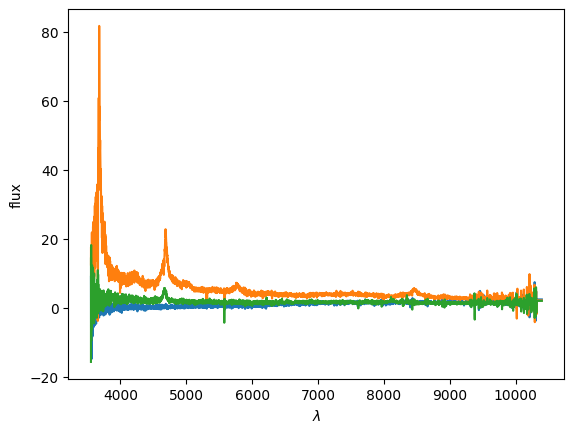

In [2]:
# Load Dataset
sdss = load_dataset(
    '../../../content/data/AstroPile/sdss',
    "boss",
    trust_remote_code=True, # We allow the custom script
    streaming=True,         # We skip the Arrow dataset building phase
    split='train',          # We only define a train sample
)
sdss = sdss.with_format('numpy')
# And we build an iterator to
sdss_iterator = iter(sdss)

example = next(sdss_iterator)
example.keys()
example['spectrum'].keys()
# Let's look at a few examples
for i in range(3):
    example = next(sdss_iterator)
    m = example['spectrum']['lambda']>-1
    plt.plot(example['spectrum']['lambda'][m], example['spectrum']['flux'][m])
    plt.xlabel('$\lambda$')
    plt.ylabel('flux')

In [3]:


sdss = sdss.with_format('torch')
B = 16 # batch size
C = 1 # num channels

# Create GenerativeWrapper for training and testing
sdss_wrapped = GenerativeWrapper(
    sdss,
    None, 
    1,
    feature_flag='spectrum.flux', # feature flag
    loading='iterated',         # iterated or full
    batch_size=B, 
    num_workers=4, 
    test_size=0.2, 
)  


In [4]:
net = NCSNpp(channels=C, dimensions=1, nf=128, ch_mult=[2, 2, 2, 2])
model = ScoreModel(model=net, sigma_min=1e-2, sigma_max=50, device="cpu")

Using the Variance Exploding SDE


In [5]:
# Train the score model, and save its weight in checkpoints_directory
!mkdir -p checkpoints
model.fit(sdss_wrapped.train_dataloader(), epochs=10, batch_size=B, learning_rate=1e-4, checkpoints_directory="checkpoints", n_iterations_in_epoch = 5)


skipping dataloader creation


Too many dataloader workers: 4 (max is dataset.n_shards=1). Stopping 3 dataloader workers.
  0%|                                                    | 0/10 [00:00<?, ?it/s]

torch.Size([16, 1, 1024])
torch.Size([16, 1, 1024])
torch.Size([16, 1, 1024])
torch.Size([16, 1, 1024])
torch.Size([16, 1, 1024])
torch.Size([16, 1, 1024])
torch.Size([16, 1, 1024])
torch.Size([16, 1, 1024])
torch.Size([1, 1, 1024])


Epoch 1 | Cost: 1.2e+03 |:  10%|█▋               | 1/10 [00:36<05:24, 36.08s/it]Too many dataloader workers: 4 (max is dataset.n_shards=1). Stopping 3 dataloader workers.


torch.Size([16, 1, 1024])
torch.Size([16, 1, 1024])


Epoch 2 | Cost: 8.2e+02 |:  20%|███▍             | 2/10 [01:02<04:02, 30.36s/it]

torch.Size([16, 1, 1024])
torch.Size([16, 1, 1024])
torch.Size([16, 1, 1024])
torch.Size([16, 1, 1024])
torch.Size([16, 1, 1024])
torch.Size([16, 1, 1024])
torch.Size([1, 1, 1024])


Epoch 3 | Cost: 7.7e+02 |:  30%|█████            | 3/10 [01:36<03:43, 31.91s/it]Too many dataloader workers: 4 (max is dataset.n_shards=1). Stopping 3 dataloader workers.


torch.Size([16, 1, 1024])
torch.Size([16, 1, 1024])
torch.Size([16, 1, 1024])


Epoch 4 | Cost: 5.3e+02 |:  40%|██████▊          | 4/10 [02:04<03:03, 30.64s/it]

torch.Size([16, 1, 1024])
torch.Size([16, 1, 1024])
torch.Size([16, 1, 1024])
torch.Size([16, 1, 1024])
torch.Size([16, 1, 1024])
torch.Size([1, 1, 1024])


Epoch 5 | Cost: 6.3e+02 |:  50%|████████▌        | 5/10 [02:36<02:34, 30.88s/it]Too many dataloader workers: 4 (max is dataset.n_shards=1). Stopping 3 dataloader workers.


torch.Size([16, 1, 1024])
torch.Size([16, 1, 1024])
torch.Size([16, 1, 1024])
torch.Size([16, 1, 1024])
torch.Size([16, 1, 1024])


Epoch 6 | Cost: 4.7e+02 |:  60%|██████████▏      | 6/10 [03:07<02:04, 31.02s/it]

torch.Size([16, 1, 1024])
torch.Size([16, 1, 1024])
torch.Size([16, 1, 1024])
torch.Size([1, 1, 1024])


Epoch 7 | Cost: 5.7e+02 |:  70%|███████████▉     | 7/10 [03:38<01:33, 31.02s/it]Too many dataloader workers: 4 (max is dataset.n_shards=1). Stopping 3 dataloader workers.


torch.Size([16, 1, 1024])
torch.Size([16, 1, 1024])
torch.Size([16, 1, 1024])
torch.Size([16, 1, 1024])
torch.Size([16, 1, 1024])
torch.Size([16, 1, 1024])


Epoch 8 | Cost: 6.5e+02 |:  80%|█████████████▌   | 8/10 [04:11<01:03, 31.59s/it]

torch.Size([16, 1, 1024])
torch.Size([16, 1, 1024])
torch.Size([1, 1, 1024])


Epoch 9 | Cost: 7.1e+02 |:  90%|███████████████▎ | 9/10 [04:35<00:29, 29.23s/it]Too many dataloader workers: 4 (max is dataset.n_shards=1). Stopping 3 dataloader workers.


torch.Size([16, 1, 1024])
torch.Size([16, 1, 1024])
torch.Size([16, 1, 1024])
torch.Size([16, 1, 1024])
torch.Size([16, 1, 1024])
torch.Size([16, 1, 1024])
torch.Size([16, 1, 1024])


Epoch 10 | Cost: 5.7e+02 |: 100%|███████████████| 10/10 [05:16<00:00, 31.61s/it]


Finished training after 0.088 hours.
torch.Size([16, 1, 1024])


[1194.3146484375,
 822.4008422851563,
 773.9626708984375,
 533.1130752563477,
 633.5326049804687,
 468.7520240783691,
 565.9731323242188,
 649.6139953613281,
 712.5301391601563,
 574.3457763671875]

Sampling from the prior | t = 0.0 | sigma = 1.1e-02| scale ~ 3.0e+00: 100%|█| 10


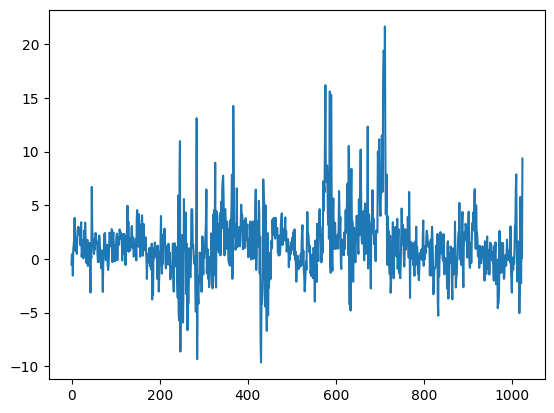

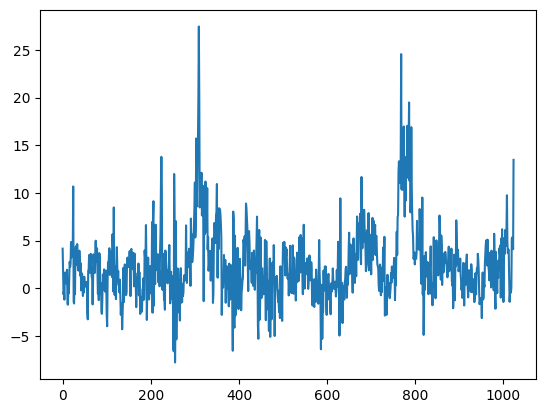

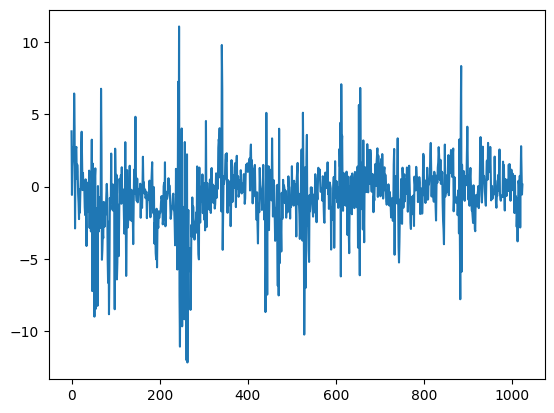

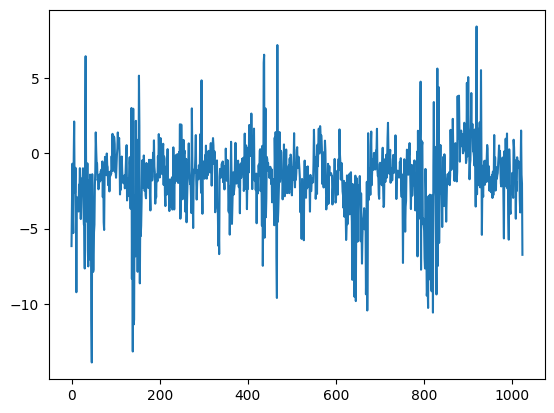

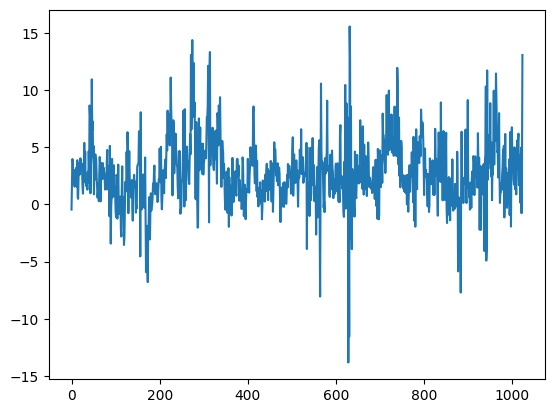

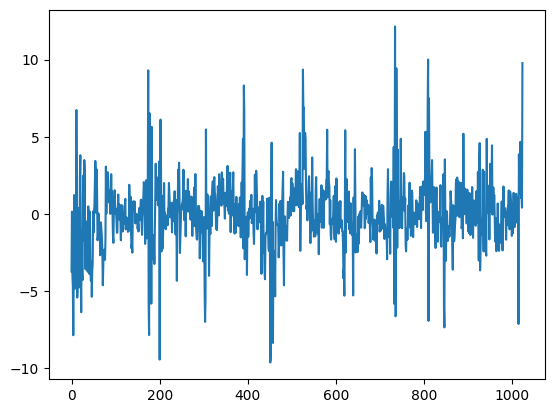

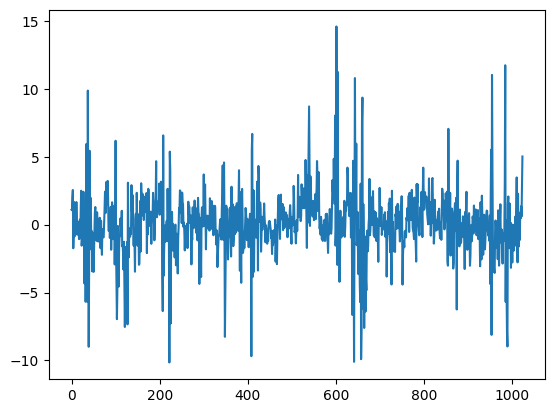

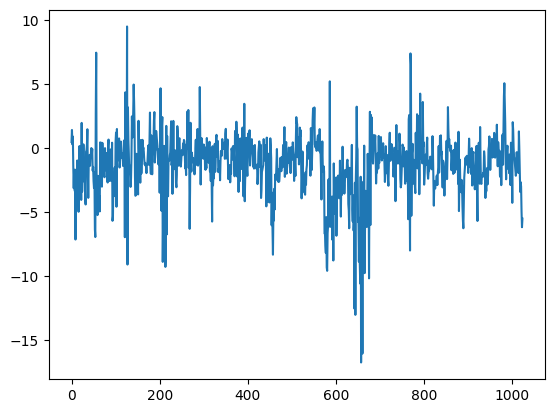

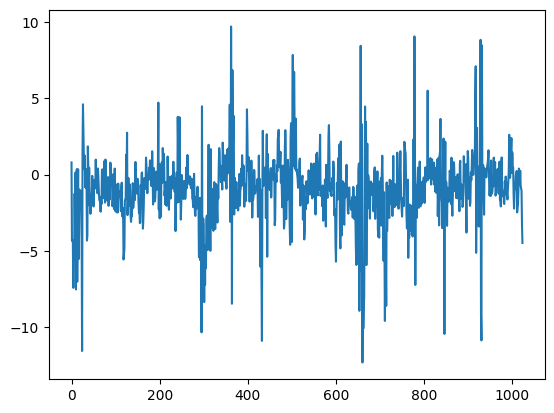

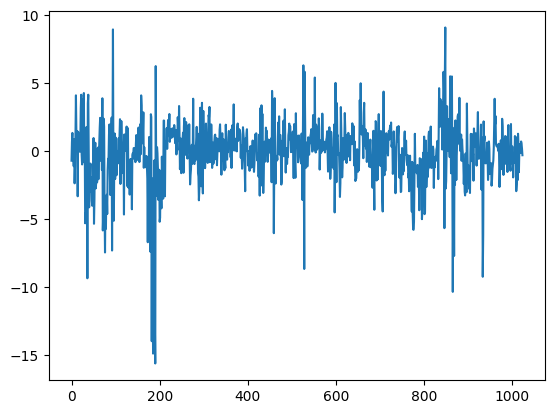

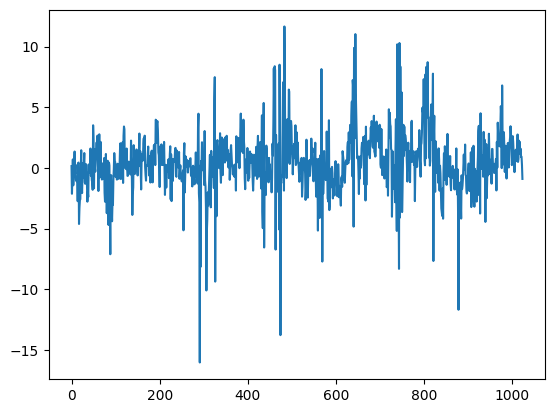

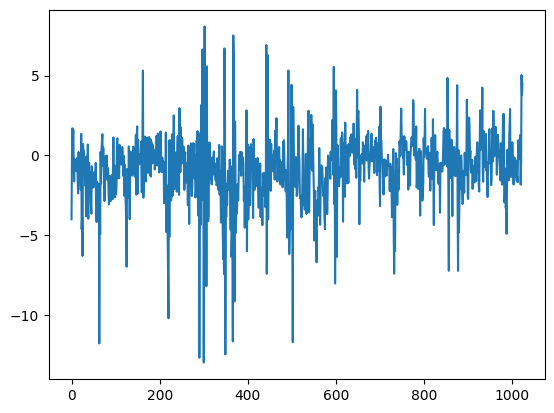

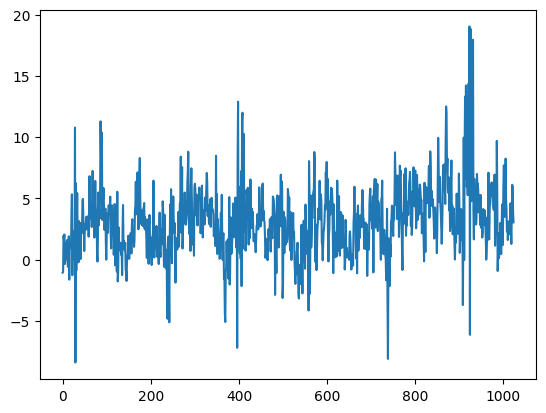

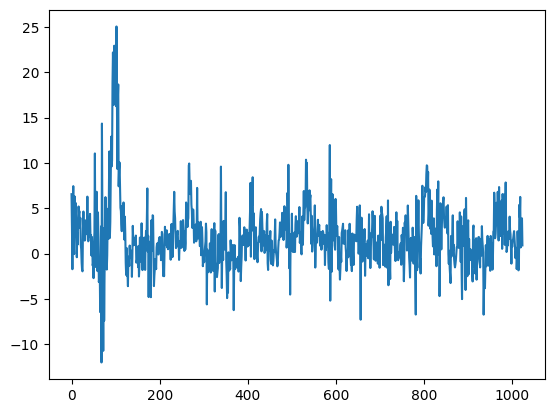

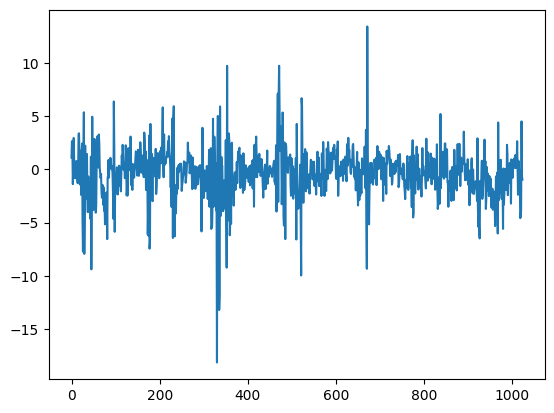

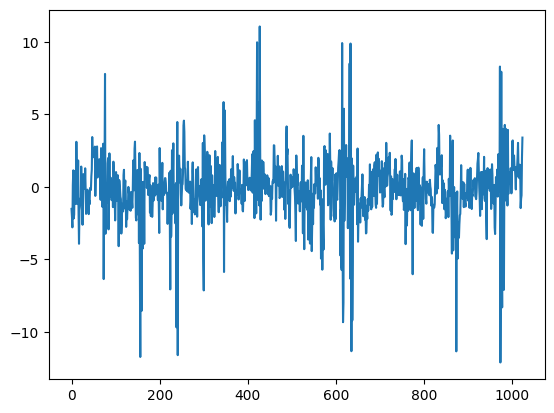

In [8]:
# Generate samples from the trained model (steps is the number of Euler-Maruyama steps)
samples = model.sample(shape=[B, 1, 1024], steps=100)

for i in range(B):
    plt.plot(samples[i][0])
    plt.show()